<a href="https://colab.research.google.com/github/yoo9519-AIdev/Learning/blob/master/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import neighbors, datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

# 모델 구축

clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

y_pred=clf.predict(X)

from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

Cross_Validation(교차 검증을 통한 확인)

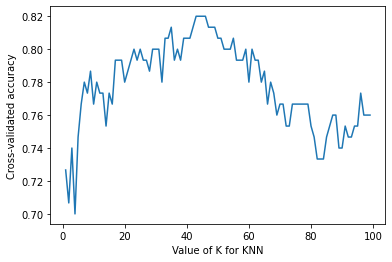

In [2]:
from sklearn.model_selection import cross_val_score

k_range = range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

Weight를 준 KNN

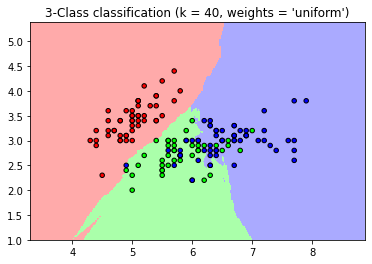

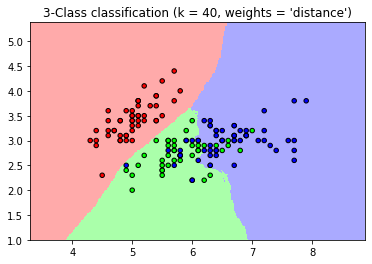

In [3]:
n_neighbors = 40

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

문제 예제

In [6]:
# Test distance function
# [x, y, type]
dataset = [[1, 2, 0],
	[1, 3, 0],
	[3, 1, 0],
	[3, 3, 0],
	[2, 0, 1],
	[2, 2, 1],
	[2, 4, 1]]

In [43]:
from math import sqrt

# calculate the Euclidean distance between two vectors
# row = [x, y, type]
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [44]:
row0 = [3,3]
for row in dataset:
	distance = euclidean_distance(row0, row)
	print(distance)

2.0
2.0
0.0
0.0
1.0
1.0
1.0


In [45]:
# 정규화하고자 하는 값을 지닌 배열을 인자로 받습니다
def min_max_normalize(lst):
  minimum, maximum  = [min(lst), max(lst)]
  normalized = []
  for value in lst:
    # 각 value를 정규화한 값을 normalized에 추가합니다
    normalized.append((value - minimum) / (maximum - minimum))

  return normalized	# 정규화된 배열을 반환합니다

In [46]:
def classify(unknown, dataset, k):
  distances = []
  for title in dataset:
    # [unknown 데이터와 특정 영화와의 거리, 영화 제목] 을 distances 배열에 추가합니다
    distances.append([distance(unknown, dataset[title]), title])
  distances.sort()	# 거리를 기준으로 distances 배열을 정렬합니다

  return distances[:k]	# 가장 가까운 k 개의 neighbors를 반환합니다

In [12]:
neighbors = get_neighbors(dataset, row0, 1)
for neighbor in neighbors:
	print(neighbor)

[3, 3, 0]


In [10]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	for neighbor in neighbors:
		print(neighbor)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

In [11]:
row0 = [3,3,0]

prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

[3, 3, 0]
[2, 2, 1]
[2, 4, 1]
Expected 0, Got 1.


In [20]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=764834998f0774ffa7a1322a529ef1e97282bec6a2285be64832141aefd44069
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [22]:
import mglearn

In [23]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [32]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [33]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [37]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


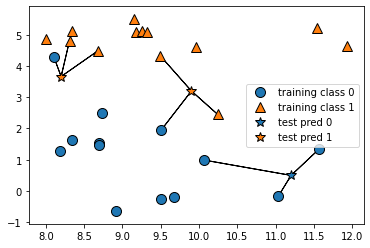

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_te

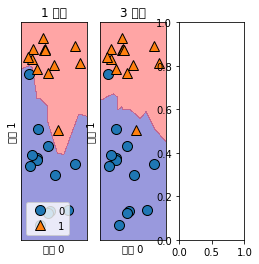

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(4, 4))

for n_neighbors, ax in zip([1, 3], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

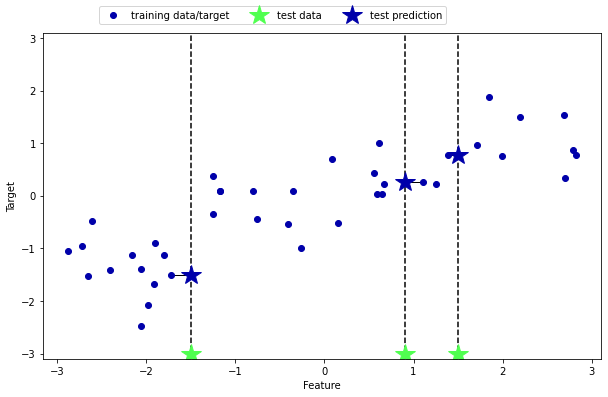

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors=1)